### **Machine Learning Final Project**

By
1.   Nayem Ahmed (student.id)
2.   Hajifa Begum Jui (student.id)
3.   Rabeya Akter (student.id)

**Task 1: Exploratory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

# dataset link : https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset

df = pd.read_csv('/content/online_shoppers_intention.csv')
df.describe()
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


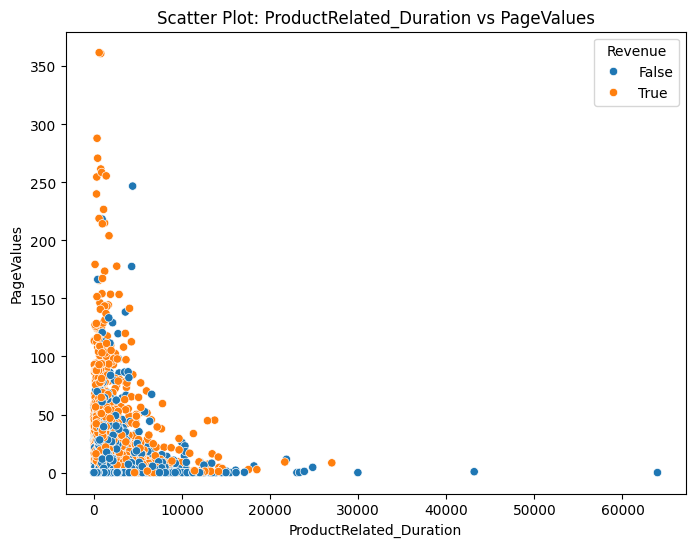

In [ ]:
# Scatter Plot

plot.figure(figsize=(8, 6))
sns.scatterplot(x='ProductRelated_Duration', y='PageValues', data=df, hue='Revenue')
plot.title('Scatter Plot: ProductRelated_Duration vs PageValues')
plot.show()

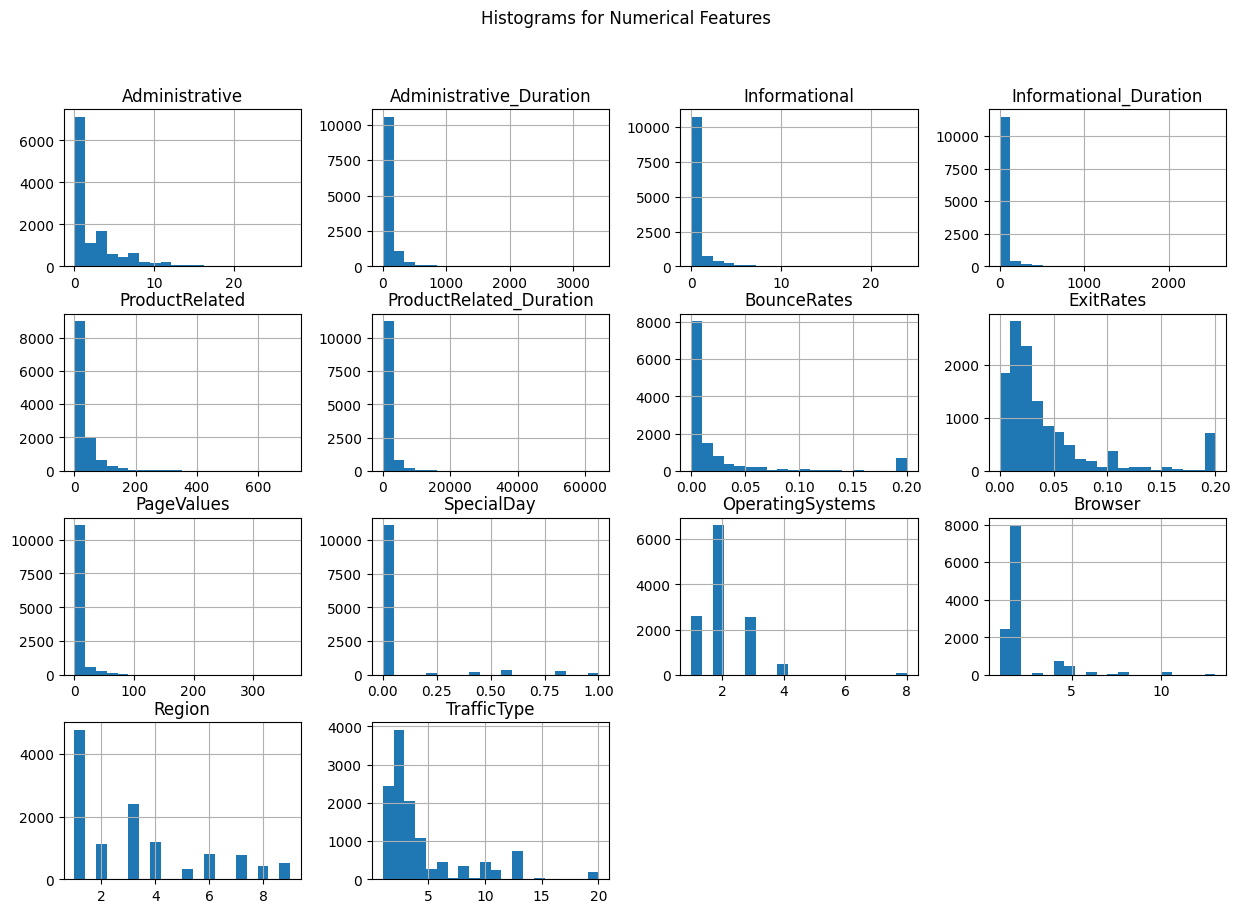

In [ ]:
df.hist(bins=20, figsize=(15, 10))
plot.suptitle('Histograms for Numerical Features')
plot.show()

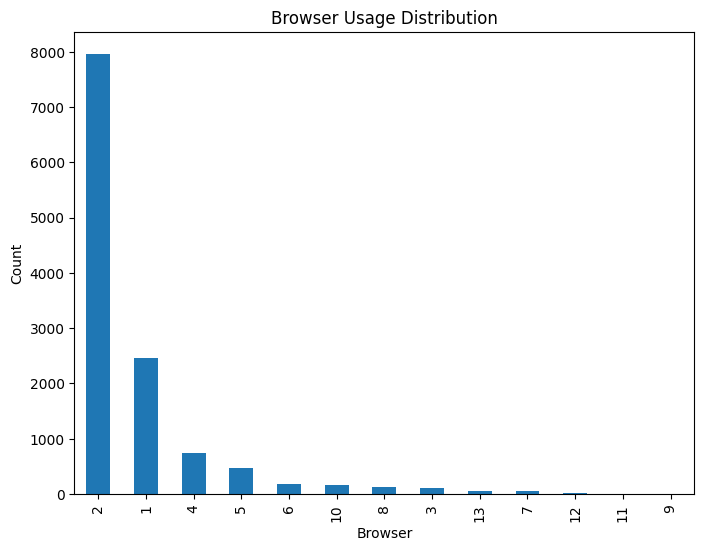

In [ ]:
# Bar Chart
df['Browser'].value_counts().plot(kind='bar', figsize=(8, 6))
plot.title('Browser Usage Distribution')
plot.xlabel('Browser')
plot.ylabel('Count')
plot.show()


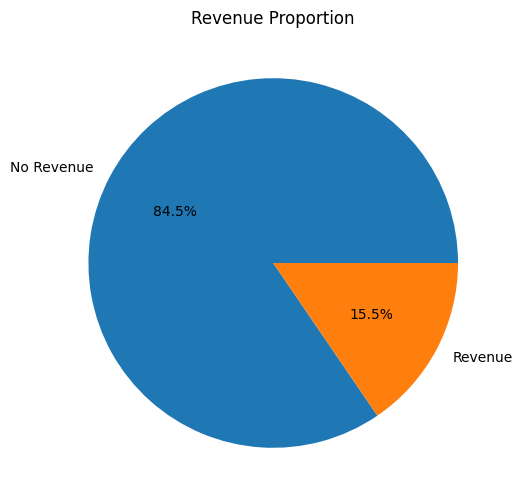

In [ ]:
# Pie Chart
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['No Revenue', 'Revenue'], figsize=(6, 6))
plot.title('Revenue Proportion')
plot.ylabel('')
plot.show()

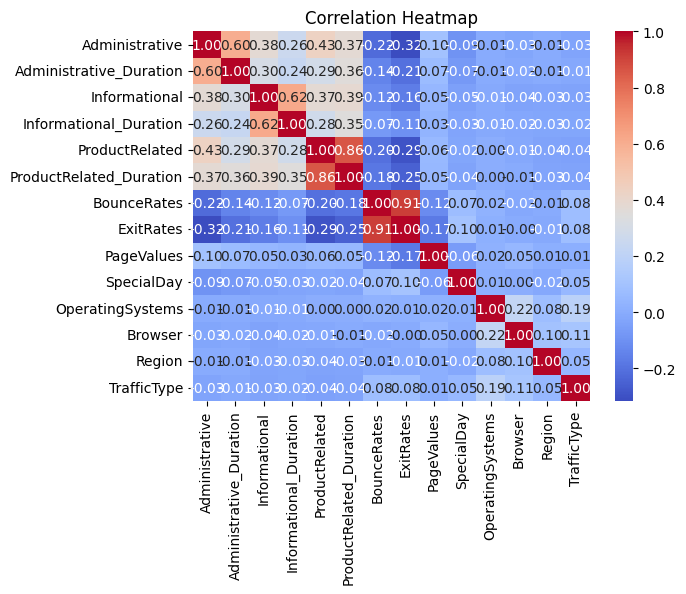

In [ ]:
# Heatmap

# Selecting numeric columns
numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plot.title('Correlation Heatmap')
plot.show()


**Task 2: Data Preprocessing**

In [ ]:
# Handling Null Values

print('Null values before cleaning:')
print(df.isnull().sum())

Null values before cleaning:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [ ]:
df.fillna(method='bfill', inplace=True)
print('Null values after cleaning:')
print(df.isnull().sum())

Null values after cleaning:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


<ipython-input-8-4501b0858930>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


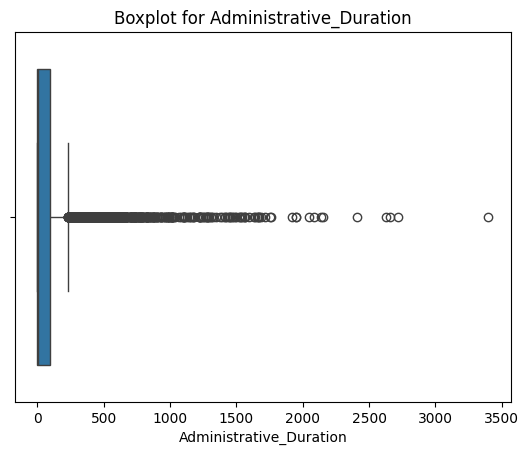

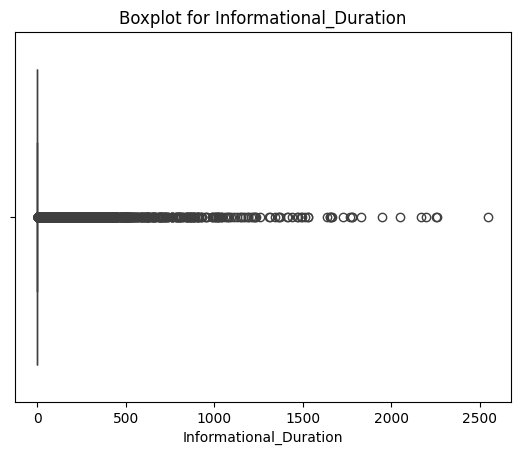

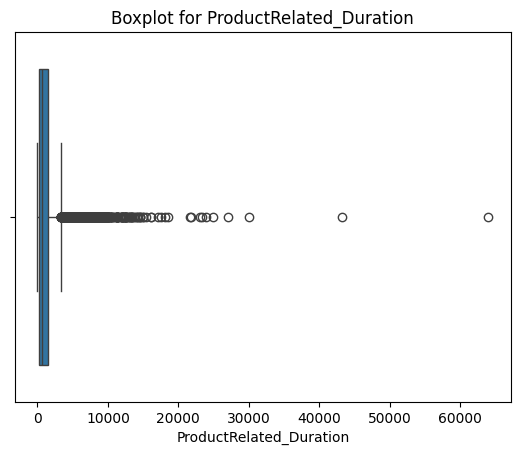

In [ ]:
# Boxplot for Outliers
for column in ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']:
    sns.boxplot(x=df[column])
    plot.title(f'Boxplot for {column}')
    plot.show()

In [ ]:
# Scaling using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']])
df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']] = scaled_features

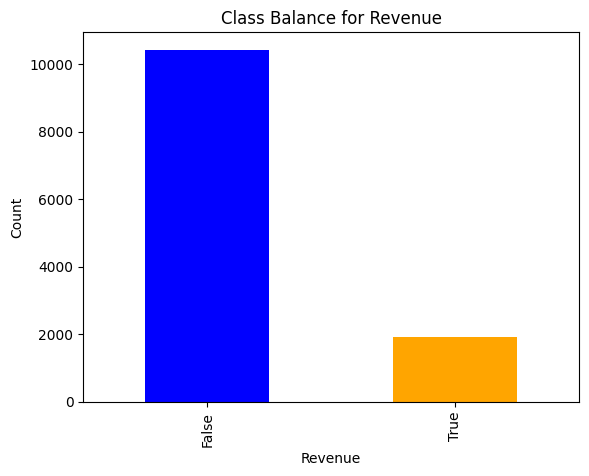

In [ ]:
# Check Class Imbalance

df['Revenue'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plot.title('Class Balance for Revenue')
plot.xlabel('Revenue')
plot.ylabel('Count')
plot.show()

In [ ]:
# converting categorical values

df = pd.get_dummies(df, columns=['Month', 'VisitorType'], drop_first=True)
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

**Split dataset into train and test set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Scaling numerical columns
scaler = MinMaxScaler()
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('Revenue')
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Splitting data
X = df.drop('Revenue', axis=1)
y = df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Task 3: Fit to ML Model**

In [ ]:
# Random Forest

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466

Confusion Matrix:
 [[1977   78]
 [ 188  223]]


In [ ]:
# Sklearn MLPClassifier

from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

y_pred_nn = mlp_model.predict(X_test)
print("MLP Neural Network Results:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))

MLP Neural Network Results:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.72      0.55      0.62       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix:
 [[1969   86]
 [ 187  224]]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# TensorFlow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
y_train_ann = to_categorical(y_train)
y_test_ann = to_categorical(y_test)

ann_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train, y_train_ann, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = ann_model.evaluate(X_test, y_test_ann)
print(f"ANN Accuracy: {accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.4198 - val_accuracy: 0.8434 - val_loss: 0.3664
Epoch 2/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8543 - loss: 0.3566 - val_accuracy: 0.8621 - val_loss: 0.3283
Epoch 3/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8740 - loss: 0.3165 - val_accuracy: 0.8708 - val_loss: 0.3113
Epoch 4/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8771 - loss: 0.3107 - val_accuracy: 0.8855 - val_loss: 0.2793
Epoch 5/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.2716 - val_accuracy: 0.8885 - val_loss: 0.2707
Epoch 6/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8926 - loss: 0.2756 - val_accuracy: 0.8956 - val_loss: 0.2637
Epoch 7/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8953 - loss: 0.2670 - val_accuracy: 0.9002 - val_loss: 0.2622
Epoch 8/20
247/247 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9000 - loss: 0.2611 - val_accuracy: 0.8961 - val_

In [ ]:
# DNN (Deep Nueral Network)

# Build the DNN Model
dnn_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
dnn_model.fit(X_train, y_train_ann, epochs=30, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = dnn_model.evaluate(X_test, y_test_ann)
print(f"DNN Accuracy: {accuracy * 100:.2f}%")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


124/124 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8373 - loss: 0.4603 - val_accuracy: 0.8434 - val_loss: 0.3740
Epoch 2/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.3691 - val_accuracy: 0.8495 - val_loss: 0.3422
Epoch 3/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8607 - loss: 0.3413 - val_accuracy: 0.8834 - val_loss: 0.3107
Epoch 4/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8708 - loss: 0.3208 - val_accuracy: 0.8865 - val_loss: 0.2891
Epoch 5/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8890 - loss: 0.2865 - val_accuracy: 0.8920 - val_loss: 0.2763
Epoch 6/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8907 - loss: 0.2740 - val_accuracy: 0.8941 - val_loss: 0.2733
Epoch 7/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.2714 - val_accuracy: 0.8925 - val_loss: 0.2586
Epoch 8/30
124/124 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8954 - loss: 0.2647 - val_accuracy: 0.8936 - val_

**Task 4. Evaluation**

1. Metrics for Random Forest and MLPClassifier

Confusion Matrix (Random Forest):
 [[1977   78]
 [ 188  223]]
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.63       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.89      2466

ROC-AUC Score (Random Forest): 0.92


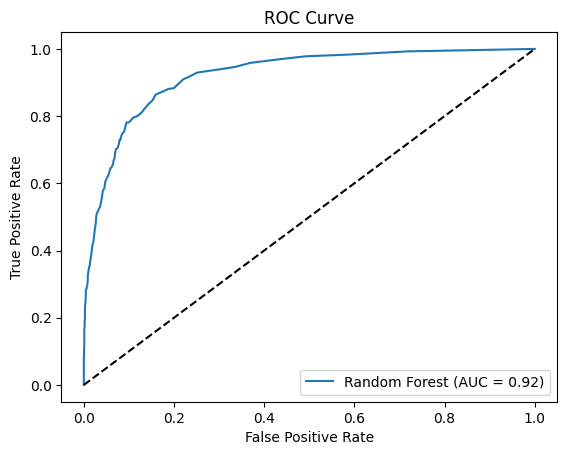

ROC-AUC Score (MLPClassifier): 0.91


In [ ]:
# Random Forest Evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix (Random Forest):\n", cm_rf)

# Classification Report
print("Classification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# AUC-ROC for Random Forest
y_pred_rf_prob = rf_model.predict_proba(X_test)[:, 1]
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)
print(f"ROC-AUC Score (Random Forest): {roc_auc_rf:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_rf_prob)
plot.plot(fpr, tpr, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plot.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plot.title("ROC Curve")
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.legend()
plot.show()

# Repeat similar evaluation for MLPClassifier
y_pred_nn_prob = mlp_model.predict_proba(X_test)[:, 1]
roc_auc_nn = roc_auc_score(y_test, y_pred_nn_prob)
print(f"ROC-AUC Score (MLPClassifier): {roc_auc_nn:.2f}")

2. Metrics for ANN/DNN

In [ ]:
# Convert predictions to binary labels
y_pred_ann = ann_model.predict(X_test).argmax(axis=1)
y_pred_dnn = dnn_model.predict(X_test).argmax(axis=1)

# ANN Evaluation
print("Classification Report (ANN):\n", classification_report(y_test, y_pred_ann))
print("Confusion Matrix (ANN):\n", confusion_matrix(y_test, y_pred_ann))

# DNN Evaluation
print("Classification Report (DNN):\n", classification_report(y_test, y_pred_dnn))
print("Confusion Matrix (DNN):\n", confusion_matrix(y_test, y_pred_dnn))

# ANN AUC-ROC
y_pred_ann_prob = ann_model.predict(X_test)[:, 1]
roc_auc_ann = roc_auc_score(y_test, y_pred_ann_prob)
print(f"ROC-AUC Score (ANN): {roc_auc_ann:.2f}")

# DNN AUC-ROC
y_pred_dnn_prob = dnn_model.predict(X_test)[:, 1]
roc_auc_dnn = roc_auc_score(y_test, y_pred_dnn_prob)
print(f"ROC-AUC Score (DNN): {roc_auc_dnn:.2f}")

78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Classification Report (ANN):
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.73      0.53      0.61       411

    accuracy                           0.89      2466
   macro avg       0.82      0.75      0.77      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix (ANN):
 [[1974   81]
 [ 193  218]]
Classification Report (DNN):
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      2055
           1       0.74      0.54      0.62       411

    accuracy                           0.89      2466
   macro avg       0.83      0.75      0.78      2466
weighted avg       0.88      0.89      0.88      2466

Confusion Matrix (DNN):
 [[1978   77]
 [ 190  221]]
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ROC-AUC Score (ANN): 0.91
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


**Note:** My dataset does not include a regression target (continuous variable), so metrics like MSE, MAE, RMSE, and R² are irrelevant here.